# Unsupervised machine learning
Author:Shi Min Chua
This is a training material I designed for a 2-hour session, in which I showed how we could conduct cluster analysis and pca on UK census data. 

# Clustering


Clustering is a method in unsupervised machine learning that involves grouping similar data points together based on inherent patterns. By categorizing data into clusters, this approach reveals underlying structures and relationships within datasets without relying on pre-labeled information.

Topics discussed in this section:

*   K-Means




## K-Means

K-means clustering (linearly) separates data into mutually exclusive k clusters. These k clusters can then be subjected to further analysis, for example comparing these clusters on some other variables (e.g., different type of social media users' performance on an attention tasks), or uses them for prediction (e.g., the purchasing power of different consumer groups).

In this lab, we conduct a k-means cluster analysis to examine how England and Wales local authorities can be categorized based on median house prices and earnings. The data is taken from [Office for National Statistics](https://www.ons.gov.uk/).  

**Import relevant libraries**

In [ ]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

**Reading the dataset**
The dataset is a csv file 'data_census_training.csv', which we have already loaded in the first code cell on the top. The data contains 8 columns, with the first 3 being the local authorities name, area code and region, the rest being the features including media house price, median earnings, proportion of people born in the UK, people indicating being White, and disabled under the Equality Act 2010.

For the first k-means clustering we are going to conduct, we are only using two features - house prices and earning.

In [ ]:
# Read the full dataset
data = pd.read_csv(census_data)

#Show the data for inspection
data


,Local_Authorities,Region,Area_Code,born_in_UK,Disabled,White_ethnicity,House_Price,Median_Earnings
0,Hartlepool,North East,E06000001,0.960320,0.228996,0.964587,125000,30345
1,Middlesbrough,North East,E06000002,0.877113,0.205108,0.823685,130000,29600
2,Redcar and Cleveland,North East,E06000003,0.970842,0.223268,0.976972,145000,26436
3,Stockton-on-Tees,North East,E06000004,0.937607,0.198642,0.920354,152450,30683
4,Darlington,North East,E06000005,0.921827,0.195762,0.943682,141100,30288
...,...,...,...,...,...,...,...,...
325,Torfaen,Wales,W06000020,0.964389,0.233007,0.970957,176000,32448
326,Monmouthshire,Wales,W06000021,0.944986,0.193412,0.969330,301250,32586
327,Newport,Wales,W06000022,0.878316,0.197172,0.855131,201000,30317
328,Powys,Wales,W06000023,0.951505,0.202840,0.977412,230000,28970


In [ ]:
# Extract the 2 features
X = data[['House_Price', 'Median_Earnings']]

**Data visualisation** Here, we visualise the median earnings on x-axis and median house prices on y-axis, with each dot representing one local authorities in England/Wales. From the scatter plot, are you able to identify any cluster?

Text(0, 0.5, 'Median Earnings')

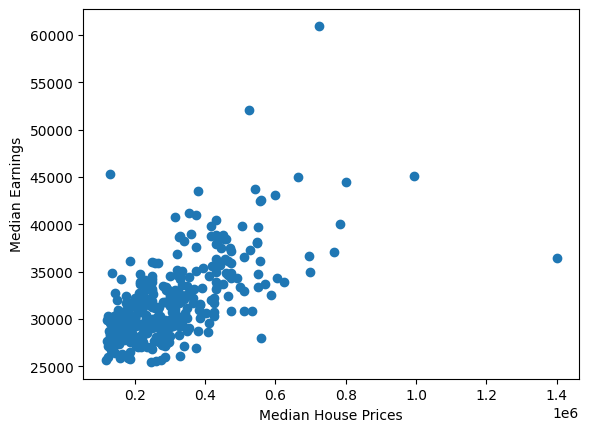

In [ ]:
plt.scatter(X['House_Price'], X['Median_Earnings'])
plt.xlabel('Median House Prices')
plt.ylabel('Median Earnings')

**(Optional) ** This interactive visualisation allows you to see the local authorities represented by each dot by hovering over them. It requires the library plotly to be installed.

In [ ]:
%pip install plotly
import plotly.express as px
fig = px.scatter(data, x="House_Price", y="Median_Earnings", hover_data=['Local_Authorities'])
fig.show()

**Normalising the data**
As with other machine learning approach, we will need to normalise the data. Here, we are using z-score [standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
# Initialise the scaler
scaler = preprocessing.StandardScaler()

# Transform the data
X_scaled = scaler.fit_transform(X)

**Conducting the cluster analysis**
In k-means analysis, we need to specify the number of clusters, i.e., k to run the algorithm. Later on, we will introduce one commonly suggested method to help with deciding on k. Here, we use k=4, and name our model as model_4_clusters.

In [ ]:
# Initialise a model with k = 4
model_4_clusters = KMeans(n_clusters = 4, random_state=0)
# Fit the model with the normalized data
model_4_clusters.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

**Output from the cluster analysis**. We could retrieve the centroid of each cluster (MODEL.cluster_centers_) as well as the cluster of each data point belongs to (MODEL.labels_). These output data can be visualised and tabulated as done by the following code.

Do note that, since we standardised the data before running the analysis, we need to inverse transform the centroids output by the algorithm back to origial data scale.

array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,

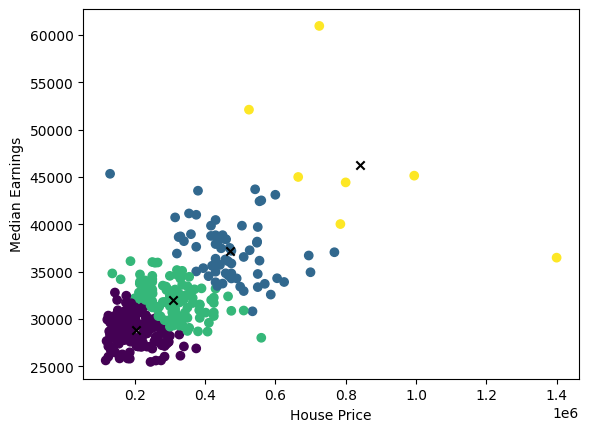

In [ ]:
# We plot a scattter plot with the colour indicating the cluster each point belongs to
plt.scatter(X['House_Price'], X['Median_Earnings'], c = model_4_clusters.labels_)
plt.xlabel('House Price')
plt.ylabel('Median Earnings')

#The marker X in black is the centroid of each cluster
#As we standardised the data before, so the centroids will be based on the standardised data. We will have to inverse transform them before plotting.
centroids = scaler.inverse_transform(model_4_clusters.cluster_centers_)
plt.scatter(centroids[:,0],centroids[:,1], c='black', marker = 'x')

model_4_clusters.labels_

In [ ]:
# Select the data which is assigned to the first cluster
data.loc[model_4_clusters.labels_==0,['House_Price','Median_Earnings','Local_Authorities','Region']]

,House_Price,Median_Earnings,Local_Authorities,Region
0,125000,30345,Hartlepool,North East
1,130000,29600,Middlesbrough,North East
2,145000,26436,Redcar and Cleveland,North East
3,152450,30683,Stockton-on-Tees,North East
4,141100,30288,Darlington,North East
...,...,...,...,...
324,125000,27097,Blaenau Gwent,Wales
325,176000,32448,Torfaen,Wales
327,201000,30317,Newport,Wales
328,230000,28970,Powys,Wales


In [ ]:
# Select the data which is assigned to the last cluster, you can create more cells to show the other two clusters with similar code.
data.loc[model_4_clusters.labels_==3,['House_Price','Median_Earnings','Local_Authorities','Region']]

,House_Price,Median_Earnings,Local_Authorities,Region
24,320000,36903,South Gloucestershire,South West
33,380000,43544,Bracknell Forest,South East
34,375000,37615,West Berkshire,South East
35,330000,38721,Reading,South East
36,354475,41143,Slough,South East
...,...,...,...,...
299,430000,40450,Newham,London
300,490000,34277,Redbridge,London
303,442500,35707,Sutton,London
305,510000,30879,Waltham Forest,London


In [ ]:
#Shows the number of local authorities(data points) in each cluster
pd.DataFrame(model_4_clusters.labels_).value_counts()

**Practice**
1. You can change the number of cluster in the above example to see how it changes the grouping.

2. You can also change the two features used to cluster the authorities, for example X = data[['born_in_UK', 'Median_Earnings']]

You can either put the code in the cell below by creating more cells, or simply change the code above


In [ ]:
## Put your code here and add more code cells as necessary

**Practice** Now, you could try to include all other features on top of the house price and earnings in the cluster analysis. We can stick to k=4 for now. Of course you can try other k after using k=4.

Note that the scatterplot we used above can only accommodate 2 features, so it would not be useful if there are more than 2 features.



In [ ]:
## Put your code here and add more code cells as necessary

In [ ]:
#@title Solution
#We put the solution in one cell, but you might have been better off separating them into different cells (which you may have done while trying yourself)
#Data preprocessing
# Read the data if you have not yet done it earlier
data = pd.read_csv(census_data)

# Extract the 5 features
X5 = data[['born_in_UK',	'Disabled', 'White_ethnicity', 'House_Price', 'Median_Earnings']]

# Normalize the data
scaler = preprocessing.StandardScaler()
X5_scaled = scaler.fit_transform(X5)

# Run the KMeans clustering with k = 4
model_4_clusters = KMeans(n_clusters = 4, random_state=0).fit(X5_scaled)

# To output the cluster centers
model_4_clusters.cluster_centers_

#Note the cluster centroid is based on the scaled X, not original X, so we need to inverse transform them if you would like to see its raw form
centroids = scaler.inverse_transform(model_4_clusters.cluster_centers_)


# Shows those clustered as 3
data.loc[model_4_clusters.labels_==3,['born_in_UK','Median_Earnings','Local_Authorities','Region']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,born_in_UK,Median_Earnings,Local_Authorities,Region
22,0.811693,34249,Bristol,South West
24,0.894403,36903,South Gloucestershire,South West
27,0.795841,34545,Swindon,South West
31,0.790108,33597,Thurrock,East of England
33,0.826303,43544,Bracknell Forest,South East
...,...,...,...,...
266,0.897118,40723,Solihull,West Midlands
278,0.790004,35610,Bexley,London
280,0.797149,36542,Bromley,London
290,0.805818,33480,Havering,London


**Elbow method** is a way to decide on the k to be used. A plot of [inertia](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html) (sum of squared distances to the closest centroid for all observations in the training set) against the k can be used to decide on which k cause the huge drop of inertia. The huge drop suggests that the next k is a good choice for most points are closests to their centroids.

In [ ]:
#Define a plotting function such that it runs k means clustering from k=1 to k = max_k as decided by the user, then plot the inertia of each k.
def plot_inertia(X, max_k:int):

    k = range(1, max_k+1)
    inertia = []
    for i in k:
        kmeans = KMeans(n_clusters = i, random_state=0).fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(k,inertia)
    plt.scatter(k,inertia)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')


In [ ]:
#Here we run 8 k-means clustering until k= 8, with our data
plot_inertia(X_scaled, max_k=8)

It seems that between k=3 and k=4, there is a huge drop of inertia, while after k=4, the decrease of inertia is relatively small, and we would not want to have too many clusters, so we settle on 4 for our k. Of course, there could be other circumstantial factors to affect this decision, as mentioned in the lecture.


**Practice**
Now, you could use the elbow method to decide on the k when you have all 5 features in the data (X5).

In [ ]:
## Put your code here and add more code cells as necessary

In [ ]:
#@title Solution
#We put the solution in one cell, but you might have been better off separating them into different cells (which you may have done while trying yourself)
#Data preprocessing
# Read the data if you have not yet done it earlier
data = pd.read_csv(census_data)

# Extract the 5 features
X5 = data[['born_in_UK',	'Disabled', 'White_ethnicity', 'House_Price', 'Median_Earnings']]

# Normalize the data
scaler = preprocessing.StandardScaler()
X5_scaled = scaler.fit_transform(X5)

#define the function for plotting inertia vs k to determine k
def plot_inertia(X, max_k:int):

    k = range(1, max_k+1)
    inertia = []
    for i in k:
        kmeans = KMeans(n_clusters = i, random_state=0, n_init="auto").fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(k,inertia)
    plt.scatter(k,inertia)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')


#determine k with elbow method.The plot seems to suggest 6 (of course it can be 4, so to some extent, elbow method is also quite subjective)
plot_inertia(X5_scaled, 10)

# Run the KMeans clustering with k = 6
model_6_clusters = KMeans(n_clusters = 6, random_state=0).fit(X5_scaled)

# To output the cluster centers
model_6_clusters.cluster_centers_

#Note the cluster centroid is based on the scaled X, not original X, so we need to inverse transform them if you would like to see its raw form
centroids = scaler.inverse_transform(model_6_clusters.cluster_centers_)


# Shows those clustered as 3
data.loc[model_6_clusters.labels_==3,['born_in_UK','Median_Earnings','Local_Authorities','Region']]



# (Optional) Example: Image Compression


As discussed in the training lecture, K-Means clustering can be used to compress an image, by reducing the number of colours used in the image to K colours.

In such application, each pixel of the image consists of 3 features (in the terminology of machine learning), R, G, B, each ranging from 0 to 255. The combination of these 3 numbers represent a particular colour. For example, (255, 255, 255) is white, (0, 0, 0) black, (255, 0, 255) purple.

Subjecting the values of these 3 features of each pixel in the image to a K-mean clustering, the algorithm identifies the K colours, which is the centroids/means of the colours clustered together. These K colours are then used to replace those colours in the clusters, such that only K colours are used to represent the pixel. The K colours are assumed to be similar to the original colour of the pixel clustered to a particular centroid.

In the example implementation below, a picture I have taken recently in Canterbury is used for this compression, such that only 8 colours are used after the compression. You can just replace with any photo of your own for this implementation.


**Read in the JPEG image to be compressed**

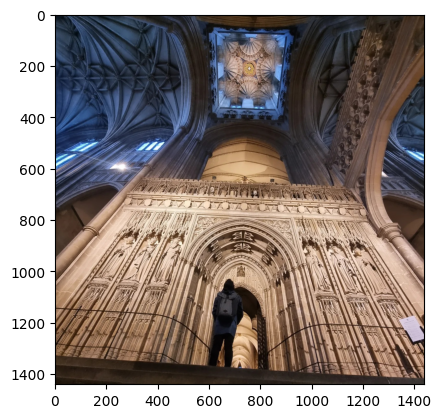

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

original_img = io.imread(cathedral)
plt.imshow(original_img)

**Image in numpy.array**
The numpy.array representing an image is in the shape of (height, width, 3), where height and width represent the number of pixel in the image, and the 3 represents the 3 colour features. You can see the height and width as the x and y-axis in the image plotted above.

In this image, there are 1440 x 1440 pixels.

In [ ]:
import numpy as np

original_img.shape

(1440, 1440, 3)

**Reshape the numpy array**
We reshape the numpy array representing the image to 2D, such that each pixel is represented by one row with 3 features.

In [ ]:
X = original_img.reshape(-1,3)
X.shape

(2073600, 3)

**Run a K-means clustering to identified 8 clusters**
Here, we choose k = 8 as we only want 8 colours (centroids) in our image, so we would like to identify 8 groups of pixel, and transform all of them into the colour represented by the centroids.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**The RGB of the 8 colours identified**

In [ ]:
#kmeans.cluster_centers_ is the command used to retrieve the centroids.
#Here we change all the centroids to integer by using astype(int) because colour representation can only be expressed in integer between 0 and
#255. In other application, you would not need to do this.

centroid_colours = kmeans.cluster_centers_.astype(int)
centroid_colours

array([[ 49,  62,  87],
       [235, 210, 190],
       [163, 130, 106],
       [ 76,  55,  41],
       [ 36,  31,  31],
       [203, 171, 148],
       [117,  89,  71],
       [ 88, 109, 151]])

**Replace each pixel with the centroid_colours**

In [ ]:
#kmeans.labels_ is the command used to retrieve the cluster each pixel belongs to.
cluster_id = kmeans.labels_

#Match each cluster_id of each pixel to the centroid colours
X_recovered = centroid_colours[cluster_id, :]

#Reshape it to original image shape
X_recovered = np.reshape(X_recovered, original_img.shape)

**Plot the compressed image**

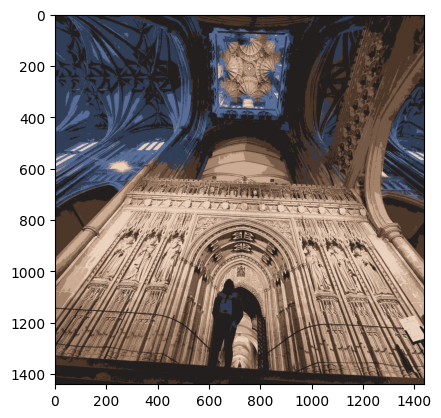

In [ ]:
plt.imshow(X_recovered)

# Dimensional Reduction


Principal Component Analysis (PCA) is a dimensionality reduction technique widely employed in data analysis and machine learning. It works by transforming high-dimensional data into a new set of uncorrelated variables, known as principal components, which capture the maximum variance in the original dataset. By discarding less significant components, PCA allows for the simplification of complex datasets while retaining essential information. This reduction in dimensionality not only aids in visualization but also enhances computational efficiency in subsequent analyses and modeling tasks.




**Demonstration**
We are going to use the census data for a demonstration of PCA, despite there being only 5 features, a relatively small number of features/variables for a PCA analysis.

As mentioned in the lecture, typically PCA is conducted when the original features/variables are highly correlated. In the census data, you can see that the proportion of people born in the UK and being white can be highly correlated. So it is likely they could be reduced to one principal component.

As a start, we only include 3 features - median earnings, proportion of people born in the UK and being white for the PCA.

**Importing relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


**Reading the dataset**

In [ ]:
data = pd.read_csv(census_data)
#Select the 3 features
X = data[['White_ethnicity', 'born_in_UK','Median_Earnings']]

**Examining the correlation among the features**

In [ ]:
#Correlation coeeficiant matrix
X.corr().style.background_gradient(cmap='coolwarm')

,White_ethnicity,born_in_UK,Median_Earnings
White_ethnicity,1.000000,0.920483,-0.477248
born_in_UK,0.920483,1.000000,-0.590272
Median_Earnings,-0.477248,-0.590272,1.000000


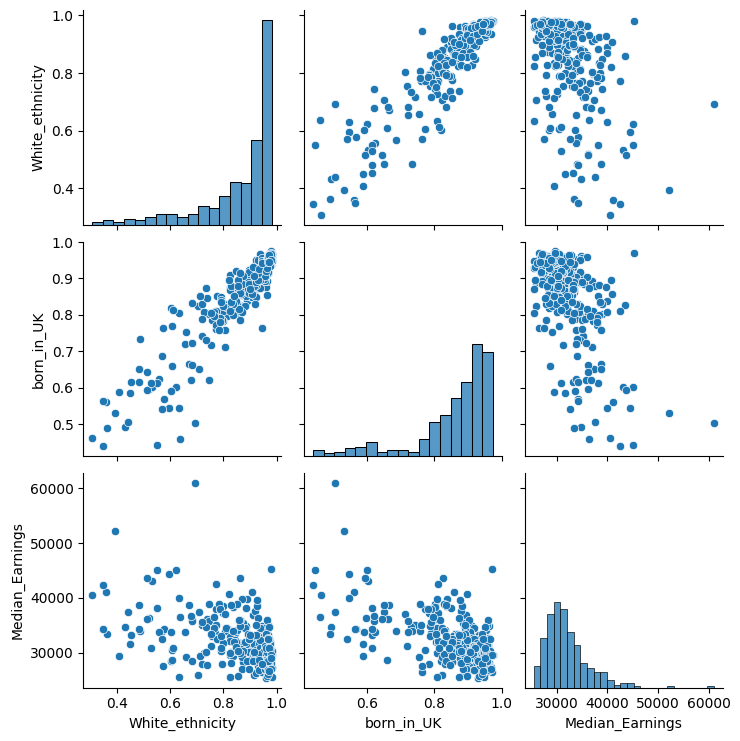

In [ ]:
#pairplot to visualise the correlation matrix
sns.pairplot(X)

**Normalising data**
Similar to clustering, we need to normalise the data before we conduct PCA.

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

**Conducting PCA**
Typically we will initialise a PCA model without telling the model how many principal components we would like to have. In this scenario, it will churn out the same number of principal components as the input features. Then, based on the explained variance by the principal components, we will decide on which principal components to keep and use.

In [ ]:
#Initialise the pca model
pca = PCA()
#Fit the model with our data
pca.fit(X_scaled)

PCA()

**Output of PCA**
There are two useful outputs from PCA. Firstly, the explained variance, which informs us of how well the new principal componenents can account for the variance in our data. Secondly, we can examine how each feature load into each principal component so as to understand the underlying relationship between the features and the component.



*1. Explained variance*

Here, we use MODEL.explained_variance_ratio_ to see the proportion of each principal component accounts for the total variance of the data. They should sum up to 1, and typically the first few principal components will have already accounted for large amount of the variance.

In [ ]:
pca.explained_variance_ratio_

array([0.78167058, 0.19524152, 0.0230879 ])

Given that the first two principal components already account for 97% of the variance, we would choose to use these 2 principal components and drop the last one by rerunning the PCA specifying the number of components we would like to have. This way, we reduce the dimension from 3 features to 2.


In [ ]:
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)

PCA(n_components=2)


*2. Feature loading to components*

To examine how each feature contribute to each component, we can use MODEL.components_ to show the relationship. Each row refers to each component, while each column corresponds to each feature. Higher absolute values correspond to a stronger influence of a feature on a component.


In [ ]:
pd.DataFrame(pca.components_)
#(n_components, n_features)

,0,1,2
0,-0.604005,-0.628457,0.490122
1,0.441113,0.248574,0.862340
2,0.663775,-0.737057,-0.127080


Here you can see that both feature 0 and 1 (born in UK and White ethnicity) contributes more to component one, while feature 2 (median earnings) contributes more to component two, as expected by our intuition that feature 0 and 1 are correlated and likely to be related to the same component more.

**Transforming Data**
After deciding on having 2 principal components for our final data, we could run a new PCA specifying the number of components we want (as done above), then use it to transform our data. The transformed data can then used for further analysis or visualisation.

In [ ]:
X_transformed = pca_2.transform(X_scaled)

#Turn the numpy.array into a panda dataframe
transformed_Df = pd.DataFrame(data = X_transformed
             , columns = ['principal component 1', 'principal component 2'])

**Practice**
Now, you could try to include all other features to run the PCA and decide on how many components you will use

In [ ]:
## Put your code here and add more code cells as necessary

In [ ]:
#@title Solution
#We put the solution in one cell, but you might have been better off separating them into different cells (which you may have done while trying yourself)
#Data preprocessing
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Read the data if you have not yet done it earlier
data = pd.read_csv(census_data)

# Extract the 5 features
X5 = data[['born_in_UK',	'Disabled', 'White_ethnicity', 'House_Price', 'Median_Earnings']]

# Normalize the data
scaler = preprocessing.StandardScaler()
X5_scaled = scaler.fit_transform(X5)

# Initialize a pca instance and put in our data
pca = PCA()
pca.fit(X5_scaled)

# Output the explained variance ratio to decide on the number of principal components to keep
pca.explained_variance_ratio_

#To show the contribution of each feature to each components
pd.DataFrame(pca.components_)

# We decided on keeping 2, so we rerun the pca specifying the number of components this time
pca_2 = PCA(n_components=2)
pca_2.fit(X5_scaled)

X5_transformed = pca_2.transform(X5_scaled)

#Turn the numpy.array into a panda dataframe
transformed_Df = pd.DataFrame(data = X5_transformed
             , columns = ['principal component 1', 'principal component 2'])


